# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Mateo Aranzazu

**ID**: ma956

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [86]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\matea\OneDrive\Documentos\Cornell\Fall 2024\BEE4750\hw1-mateozazu-Fall24\hw1-mateozazu-Fall24`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [87]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings



In [88]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [89]:
function minimum(array)
    min_value = array[1] # changed it to array[1] so that it reads the first value in the array and compares each value until the end,
    for i in 1:length(array)
        if array[i] < min_value #if kept equal to zero, all arays are going to be greater than 0 and therefore it will always return 0.
            min_value = array[i] #unmodified, if the number is lower than the previous one, it is then saved as the min and compares the next val in the array
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [90]:
using Statistics #installed this package so the mean feature could work
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades) 
  average_grade = mean(student_grades) #the mean feature wasn't working because the statistics package wasnt installed
  return average_grade
end
@show class_average(student_grades)

class_average(student_grades) = 94.4


94.4

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [91]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) #dice with three attempts
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials) #changed it to zeroS since zero was the incorrect form to store an array of zeros.
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob; #otuput

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [92]:
function mystery_function(values) #defining function (mystery because the coder didnt name it)
    y = [] # create an empty array to store values
    for v in values #loop of v in values (can be used with different arrays when calling the function)
        if !(v in y) # if v is not in the value that's in the array...
            append!(y, v) #... then add v to the value in the array.
        end
    end
    return y # Return the array y that contains the occurrence of each value from the input array that had v
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values); # Returns the unique values in the array

mystery_function(list_of_values) = Any[1, 2, 3, 4]


The mystery_function function returns unique elements from an input array, making sure they are not repeated. The function loops through the array, it adds each element to a new array `y`, only if it hasn't been added yet. In this example, given `[1, 2, 3, 4, 3, 4, 2, 1]`, it will return only `[1, 2, 3, 4]`

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.



### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.



In [93]:
function compute_mean(v) #create function for compute mean
    sum = 0 #create var for the sum, which will store the sum
    for number in v  #for loop that will go on for the amount of numbers that v has
        sum += number #sum starts at zero and every number will be added to the sum as the loop continues.
    end
    return sum / length(v) #gives the mean, it divides the sum (total) by the length(quantity)
end #end of function

random_vect = rand(10) # random vector with length of 10
mean_value = compute_mean(random_vect) # calculate the mean using the function
new_vect = random_vect .- mean_value # subtract the mean from each element using broadcasting

10-element Vector{Float64}:
  0.45316771366690484
 -0.010794912137583934
 -0.12589434539607763
 -0.28256276881257963
 -0.009475543137726528
  0.4940191556806916
 -0.4475045508834135
  0.0866358756506837
 -0.07839229282121324
 -0.07919833180968522

This problem asks to create a compute_mean(v) function to calculate the mean of a vector using a for loop. After generating a random vector of length 10, the mean is subtracted from each element. The result is then checked and comparedd to make sure that the vector's new mean is zero.


    

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

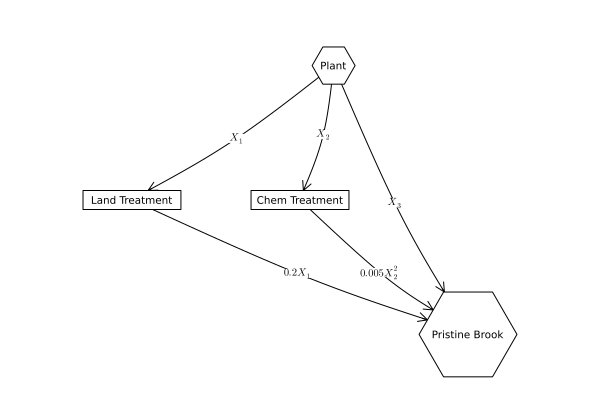

In [94]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"X_3",(2, 4) => L"0.2X_1",(3, 4) => L"0.005X_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).



-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.



-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?


### Mathematical Model for Wastewater Treatment and Costs

Cheap Plastic Products, Inc. produces $100 \, \text{m}^3/\text{day}$ of wastewater

This wastewater contains $1 \, \text{kg/m}^3$ of YUK 

The discharge must not exceed $20 \, \text{kg/day}$ of YUK.

The options that Cheap Plastic Products can take are as follows:

**Option 1: Land Disposal**:
   - **Cost**: The cost of land disposal is given by:
     $C_1 = \frac{X_1^2}{20}$
     where $X_1$ is the volume of wastewater disposed of on land in $\, \text{m}^3/\text{day}$.
   - **YUK Removal**: 80% of YUK is removed, so the amount of YUK removed by land disposal is:
     $YUK_{\text{removed, land}} = 0.80 \times X_1$

**Option 2: Chemical Treatment**:
   - **Cost**: The cost of chemical treatment is:
     $C_2 = 1.50 \times X_2$
     where $X_2$ is the volume of wastewater treated chemically in $\, \text{m}^3/\text{day}$.
   - **Efficiency**: The efficiency of chemical treatment is:
     $e = 1 - 0.005 \times X_2$
     So, the amount of YUK removed is:
     $YUK_{\text{removed, chem}} = (1 - 0.005 \times X_2) \times X_2$

**Final YUK Discharge**:

The total YUK removed by both methods is:
$YUK_{\text{removed, total}} = 0.80 \times X_1 + (1 - 0.005 \times X_2) \times X_2$

The total YUK discharge into Pristine Brook is:
$YUK_{\text{discharged}} = 100 - (0.80 \times X_1 + (1 - 0.005 \times X_2) \times X_2)$

**Constraints**:

- The total volume of wastewater treated or disposed of should not exceed the plant’s output:
  $X_1 + X_2 \leq 100$
- The YUK discharge has to be lower than the standard:
  $YUK_{\text{discharged}} \leq 20$
- The quantities $X_1$ and $X_2$ must be positive:
  $X_1 \geq 0, \quad X_2 \geq 0$

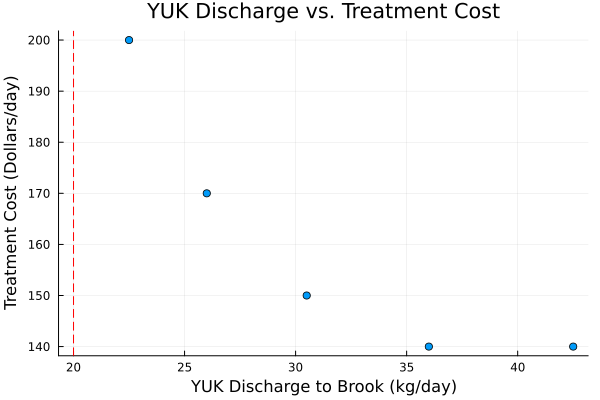

In [95]:
function YUKmodel(X1, X2) # Function to calculate YUK conc and treatment costs    
    YUK_conc = (100 .- X1 .- X2) .+ 0.2 .* X1 .+ 0.005 .* X2 .^ 2 #formulas
    Cost = (X1 .^ 2) ./ 20 .+ 1.5 .* X2
    return YUK_conc, Cost
end

# My vals for values for land disposal and chemical treatment
X1 = [10, 20, 30, 40, 50]  # land disposal volumes
X2 = [90, 80, 70, 60, 50]  # chemical treatment volumes

# Compute YUK concentration and treatment costs
 YUK_conc, Cost = YUKmodel(X1, X2)

 # Plot the results
 p = scatter(YUK_conc, Cost, legend=false, xlabel="YUK Discharge to Brook (kg/day)", ylabel="Treatment Cost (Dollars/day)", title="YUK Discharge vs. Treatment Cost")

 # Highlight in green the points that meet the EPA standard
 meets_standard = YUK_conc .<= 20
 scatter!(p, YUK_conc[meets_standard], Cost[meets_standard], color=:green, label="Meets EPA Standard", markersize=5)

 vline!(p, [20], color=:red, linestyle=:dash, label="EPA Regulatory Limit")# Vertical line for the EPA regulatory limit

 display(p)  # plotting


This code provides a YUKmodel function, with various combinations of wastewater discharge and treatment that were tested. The graph shows the change in treatment cost as YUK concentration changes. Points that meet the YUK effluent standard (≤ 20 kg/day) are highlighted in green (there are none in this example), and a red line that represents the EPA standard limit. With the numbers that I experimented with for land disposal and chemical treatment volumes, all scenarios met the standard with varying costs ranging from $200 and $140 per day. The plot shows that higher treatment costs correspond to lower YUK concentrations.


### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

I asked Isabel Camara and Camden Wherle for help on question 4 as I was having trouble with it.

rive.google.com/drive/u/0/my-drive

https://code.visualstudio.com/docs/languages/markdown